In [1]:
from google.colab import files
uploaded = files.upload()


Saving landslide_india_dataset.csv to landslide_india_dataset.csv


In [2]:
import pandas as pd
df = pd.read_csv('landslide_india_dataset.csv')

In [4]:
df.head()

Latitude   Longitude  Rainfall (mm)  Temperature (Celsius)  \
0  14.999134 -110.666487     220.967159              14.706568   
1  42.477849   28.268884     249.503062              34.465485   
2  48.772872  131.624918     117.218032              35.251346   
3  15.533700  122.241618     185.011543              35.598201   
4  15.154795  130.178054     130.032892              29.182151   

   Soil Moisture (%)  Slope Angle (°)  Elevation (m)  Terrain Aspect (°)  \
0          99.252484        47.164451       6.942228          281.767353   
1          91.365361        45.102990       4.376114          316.747056   
2          85.987315        26.031087       4.560610          233.961468   
3          99.113435        13.173474       7.170135           77.865231   
4          98.968152        22.513097       1.502990          339.801414   

  Lithology  Land Cover Soil Type  Distance to Road (m)  \
0   Granite      Forest      Clay           1347.094828   
1     Shale       Urban      Loam           5212.823896   
2     Shale  Water Body      Loam           9009.708344   
3   Granite       Urban      Loam           5159.761733   
4     Shale      Forest      Clay           3833.209279   

   Historical Landslides  Landslide Occurred  
0                      0                   0  
1                      1                   1  
2                      1                   1  
3                      1                   0  
4                      0                   1

In [6]:
from sklearn.preprocessing import LabelEncoder

# Columns to encode
categorical_cols = ['Lithology', 'Land Cover', 'Soil Type']

# Initialize encoder
le = LabelEncoder()

# Encode each column
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])


print(df[categorical_cols].head())


   Lithology  Land Cover  Soil Type
0          0           1          0
1          1           2          1
2          1           3          1
3          0           2          1
4          1           1          0


In [7]:
df.head()

Latitude   Longitude  Rainfall (mm)  Temperature (Celsius)  \
0  14.999134 -110.666487     220.967159              14.706568   
1  42.477849   28.268884     249.503062              34.465485   
2  48.772872  131.624918     117.218032              35.251346   
3  15.533700  122.241618     185.011543              35.598201   
4  15.154795  130.178054     130.032892              29.182151   

   Soil Moisture (%)  Slope Angle (°)  Elevation (m)  Terrain Aspect (°)  \
0          99.252484        47.164451       6.942228          281.767353   
1          91.365361        45.102990       4.376114          316.747056   
2          85.987315        26.031087       4.560610          233.961468   
3          99.113435        13.173474       7.170135           77.865231   
4          98.968152        22.513097       1.502990          339.801414   

   Lithology  Land Cover  Soil Type  Distance to Road (m)  \
0          0           1          0           1347.094828   
1          1           2          1           5212.823896   
2          1           3          1           9009.708344   
3          0           2          1           5159.761733   
4          1           1          0           3833.209279   

   Historical Landslides  Landslide Occurred  
0                      0                   0  
1                      1                   1  
2                      1                   1  
3                      1                   0  
4                      0                   1

/usr/local/lib/python3.12/dist-packages/cartopy/io/__init__.py:242: DownloadWarning:

Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_land.zip

/usr/local/lib/python3.12/dist-packages/cartopy/io/__init__.py:242: DownloadWarning:

Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_ocean.zip

/usr/local/lib/python3.12/dist-packages/cartopy/io/__init__.py:242: DownloadWarning:

Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_coastline.zip

/usr/local/lib/python3.12/dist-packages/cartopy/io/__init__.py:242: DownloadWarning:

Downloading: https://naturalearth.s3.amazonaws.com/10m_cultural/ne_10m_admin_0_boundary_lines_land.zip



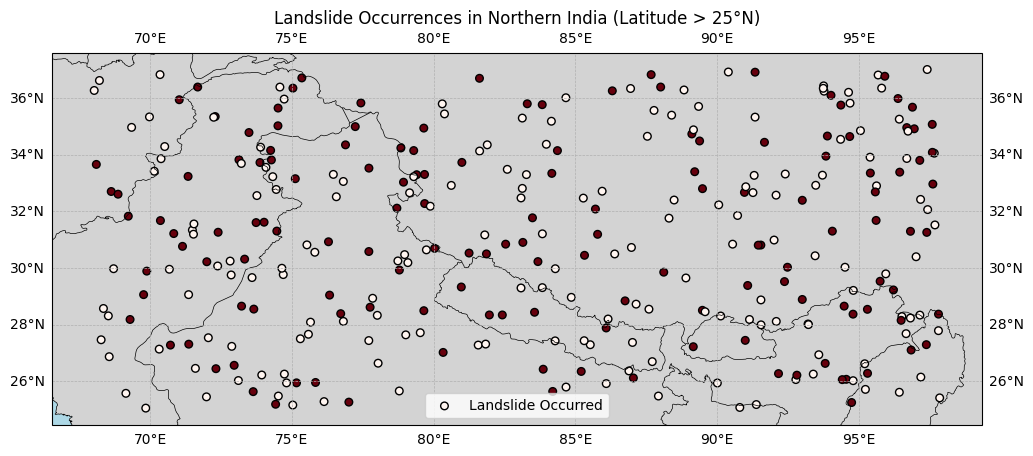

In [17]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Filter landslide data: India bounds AND Latitude > 25N
india_df = df[
    (df['Latitude'] >= 25) & (df['Latitude'] <= 37) &
    (df['Longitude'] >= 68) & (df['Longitude'] <= 98)
]

# Create map
plt.figure(figsize=(12,8))
ax = plt.axes(projection=ccrs.PlateCarree())

# Add base features
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.add_feature(cfeature.OCEAN, facecolor='lightblue')
ax.add_feature(cfeature.COASTLINE, linewidth=0.5)
ax.add_feature(cfeature.BORDERS, linewidth=0.5)
ax.gridlines(draw_labels=True, linestyle='--', linewidth=0.5)

# Plot landslide locations
scatter = ax.scatter(
    india_df['Longitude'],
    india_df['Latitude'],
    c=india_df['Landslide Occurred'],
    cmap='Reds',
    s=30,
    edgecolor='k',
    transform=ccrs.PlateCarree(),
    label='Landslide Occurred'
)

plt.title('Landslide Occurrences in Northern India (Latitude > 25°N)')
plt.legend()
plt.show()


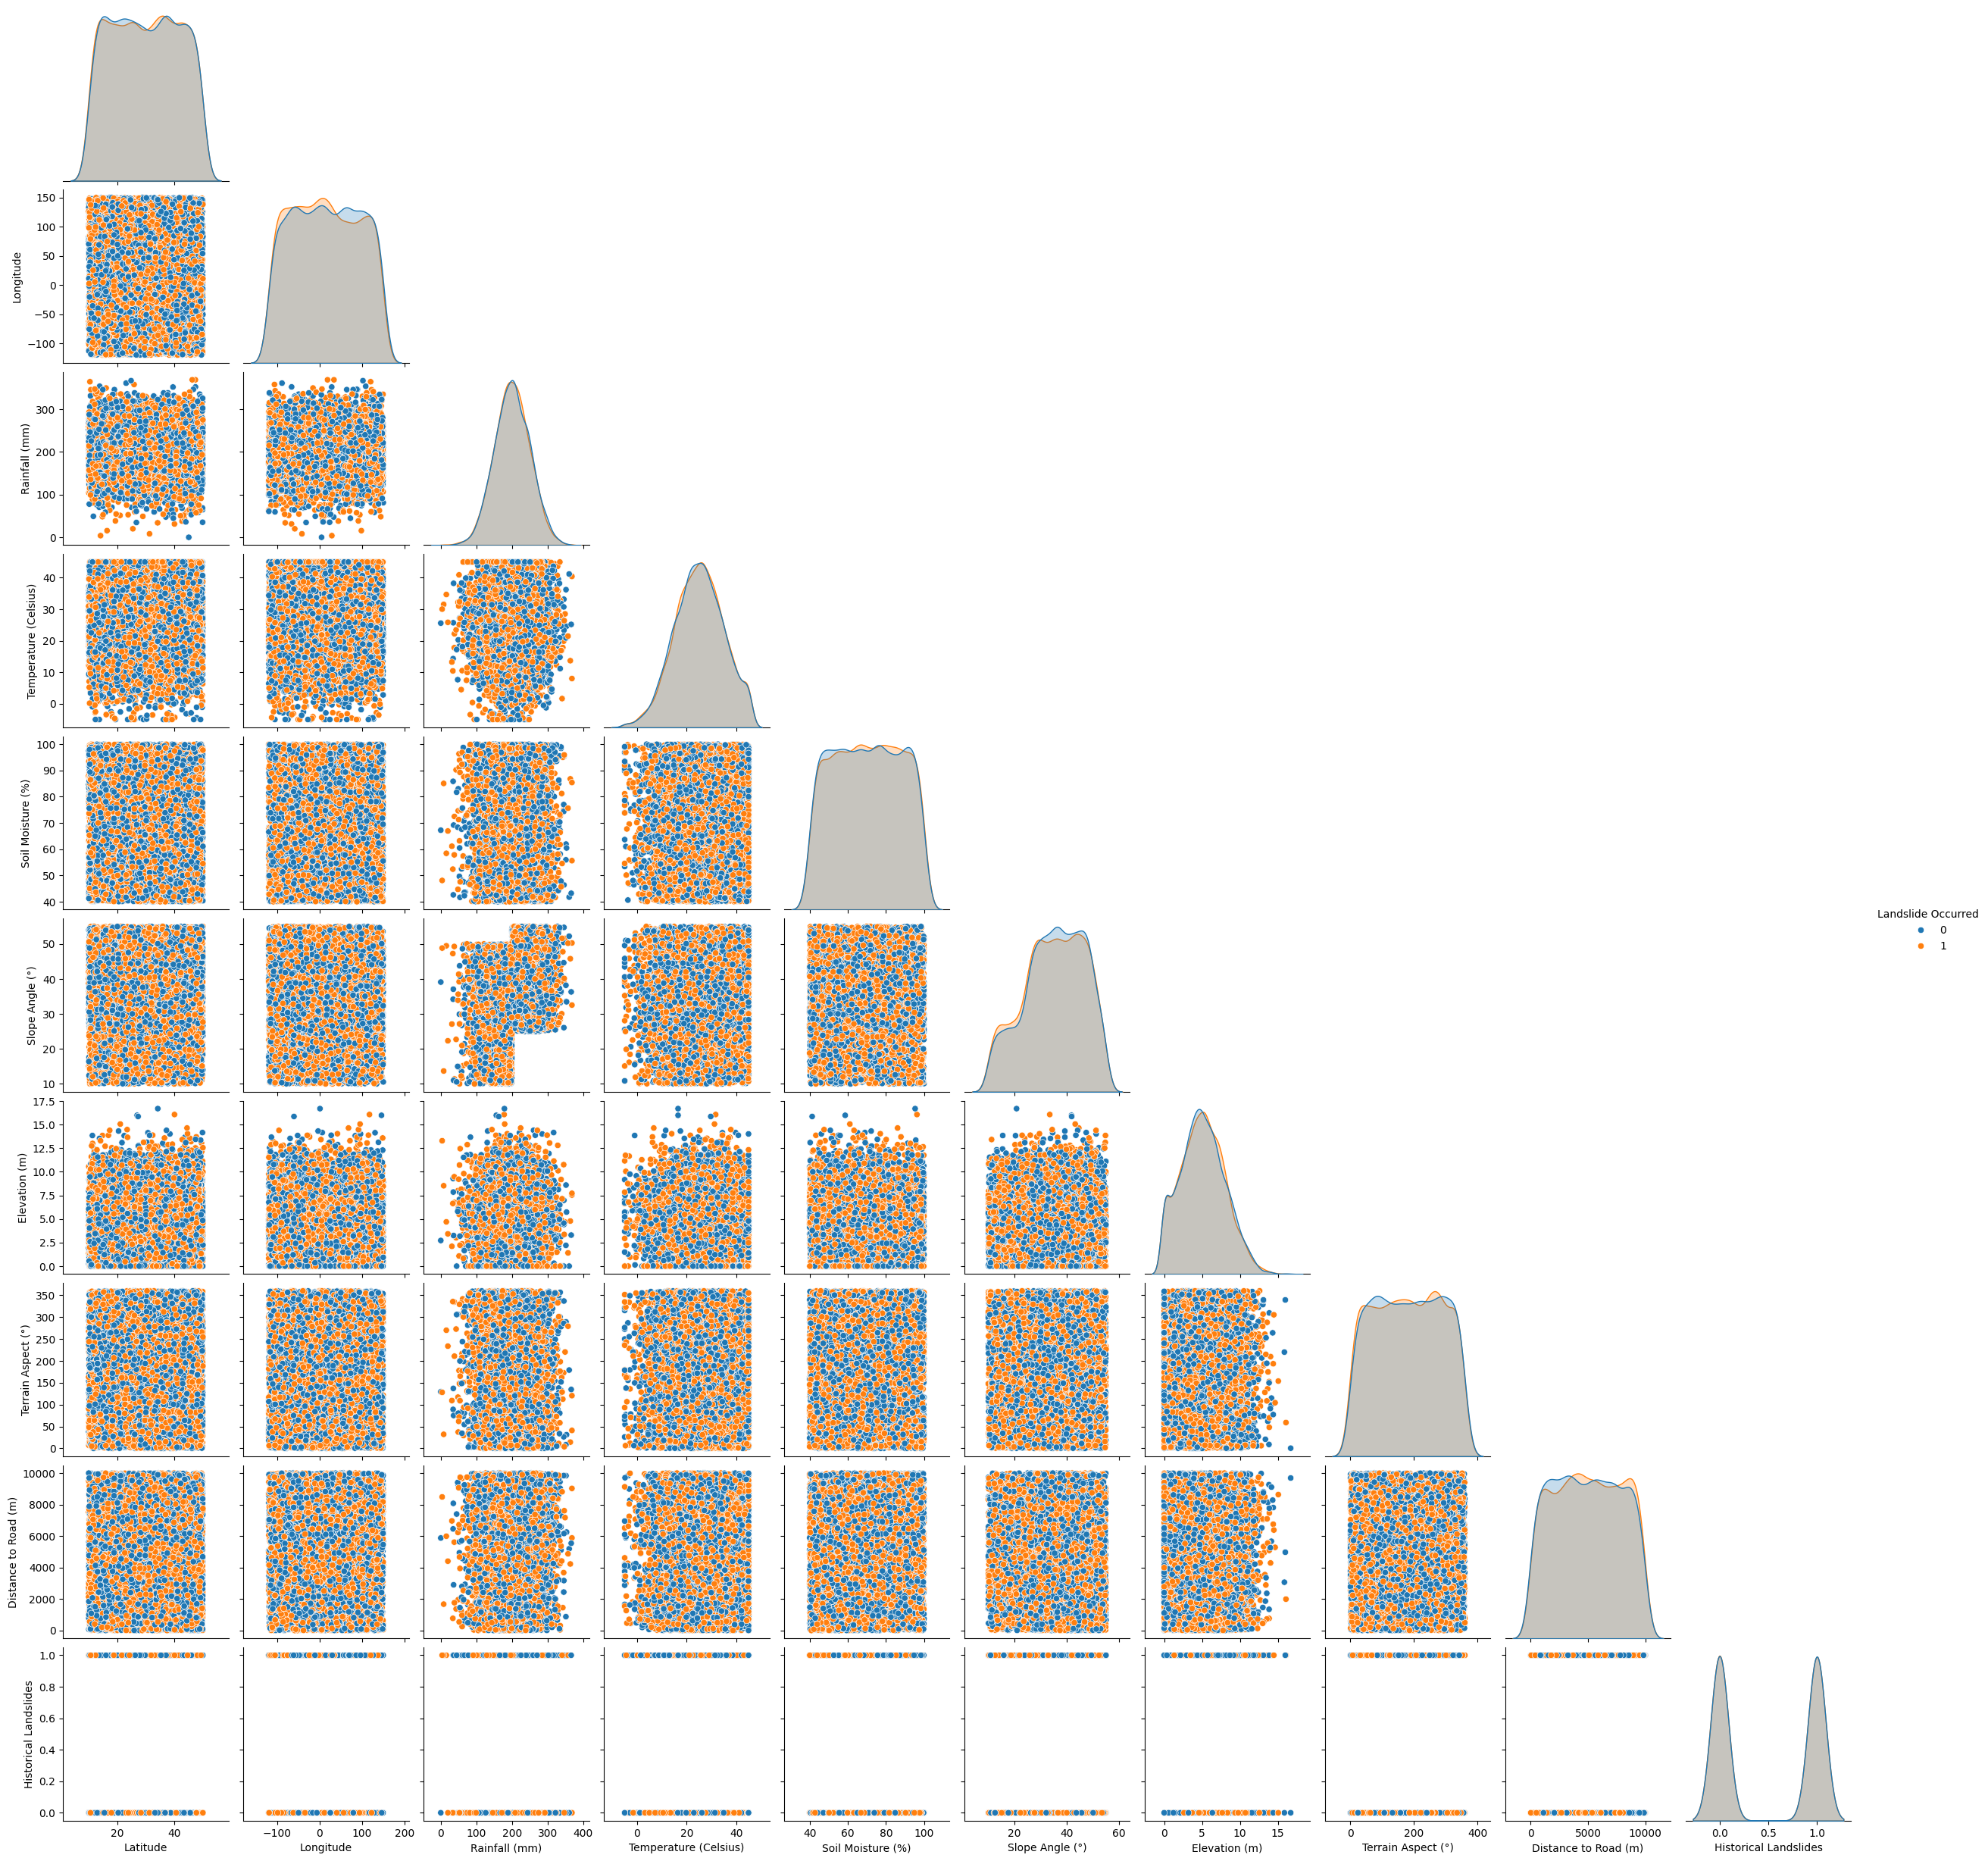

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_cols = ['Latitude','Longitude','Rainfall (mm)','Temperature (Celsius)',
                'Soil Moisture (%)','Slope Angle (°)','Elevation (m)',
                'Terrain Aspect (°)','Distance to Road (m)','Historical Landslides',
                'Landslide Occurred']

sns.pairplot(df[numeric_cols], hue='Landslide Occurred', corner=True, diag_kind='kde')
plt.show()


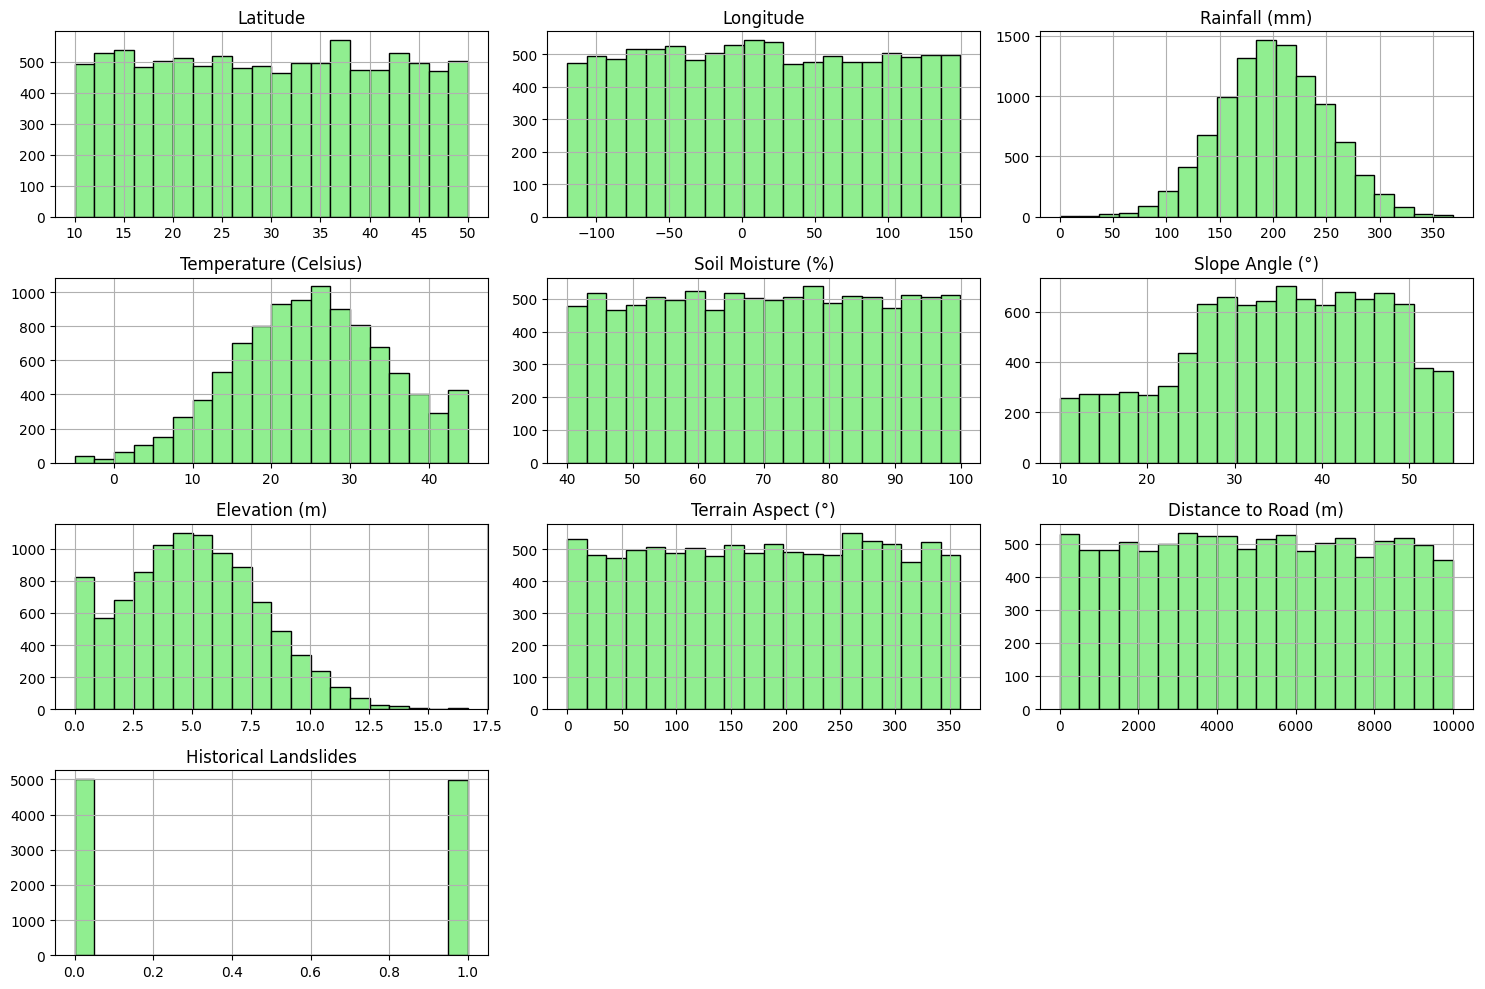

In [19]:
df[numeric_cols[:-1]].hist(bins=20, figsize=(15,10), color='lightgreen', edgecolor='black')
plt.tight_layout()
plt.show()


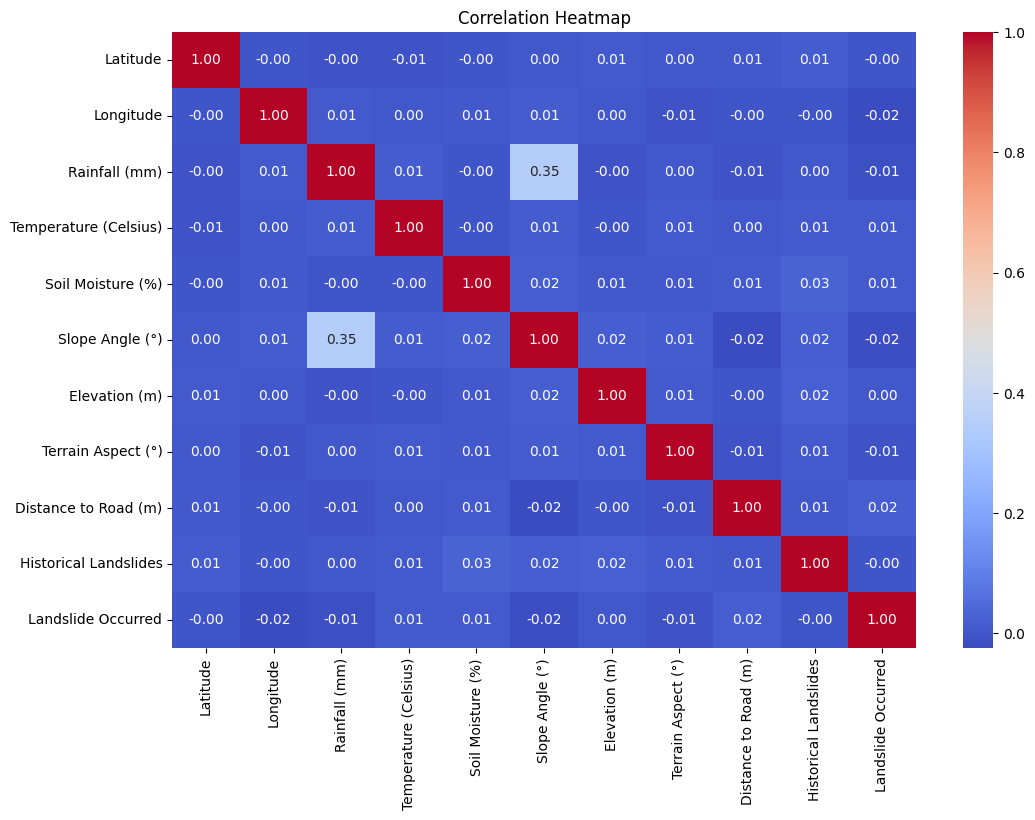

In [20]:
plt.figure(figsize=(12,8))
corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


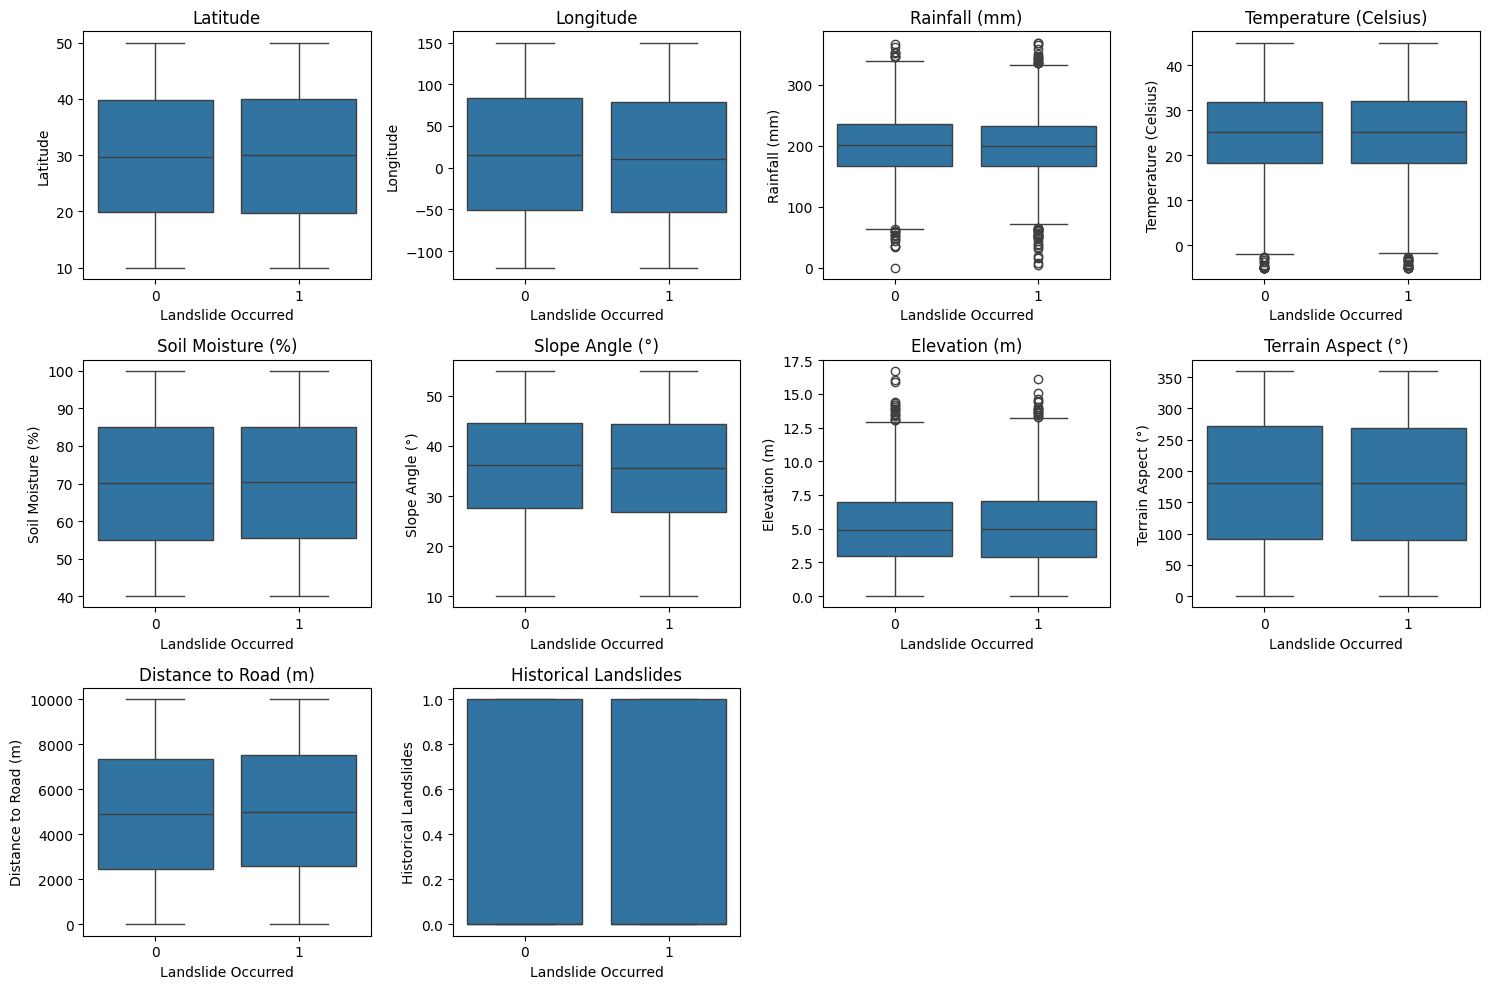

In [21]:
plt.figure(figsize=(15,10))
for i, col in enumerate(numeric_cols[:-1], 1):
    plt.subplot(3,4,i)
    sns.boxplot(x='Landslide Occurred', y=col, data=df)
    plt.title(col)
plt.tight_layout()
plt.show()


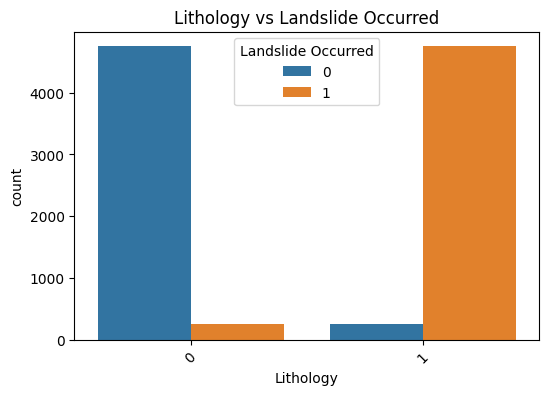

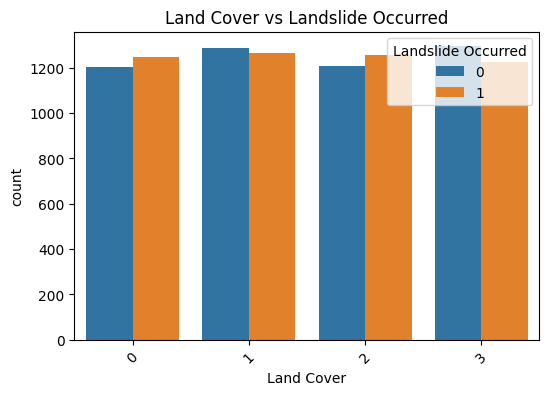

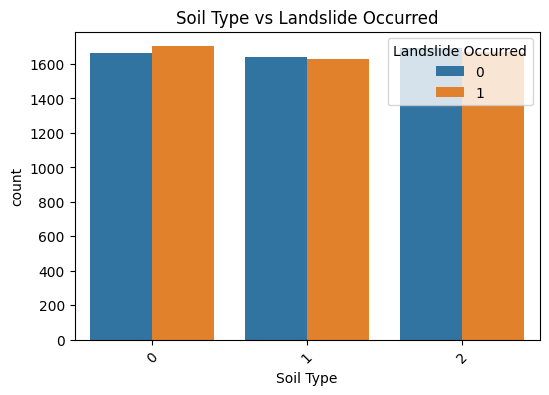

In [22]:
categorical_cols = ['Lithology','Land Cover','Soil Type']

for col in categorical_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, hue='Landslide Occurred', data=df)
    plt.title(f'{col} vs Landslide Occurred')
    plt.xticks(rotation=45)
    plt.show()


In [23]:
# -----------------------------
# XGBoost Classifier
# -----------------------------
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Features and target
X = df.drop('Landslide Occurred', axis=1)
y = df['Landslide Occurred']

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model
xgb_model = xgb.XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

# Train
xgb_model.fit(X_train, y_train)

# Predict
y_pred = xgb_model.predict(X_test)

# Accuracy
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning:

[16:21:02] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.




XGBoost Accuracy: 0.9475
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      1015
           1       0.95      0.94      0.95       985

    accuracy                           0.95      2000
   macro avg       0.95      0.95      0.95      2000
weighted avg       0.95      0.95      0.95      2000



In [24]:
# -----------------------------
# SVM Classifier
# -----------------------------
from sklearn.svm import SVC

# Standardization improves SVM performance
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Model
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)

# Train
svm_model.fit(X_train, y_train)

# Predict
y_pred = svm_model.predict(X_test)

# Accuracy
print("SVM Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


SVM Accuracy: 0.948
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      1015
           1       0.95      0.95      0.95       985

    accuracy                           0.95      2000
   macro avg       0.95      0.95      0.95      2000
weighted avg       0.95      0.95      0.95      2000



In [25]:
# -----------------------------
# Feedforward Neural Network
# -----------------------------
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Build model
fnn_model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')   # binary classification
])

# Compile
fnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train
history = fnn_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate
loss, accuracy = fnn_model.evaluate(X_test, y_test)
print("FNN Accuracy:", accuracy)


Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8272 - loss: 0.4583 - val_accuracy: 0.9556 - val_loss: 0.1880
Epoch 2/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9466 - loss: 0.2100 - val_accuracy: 0.9556 - val_loss: 0.1894
Epoch 3/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9465 - loss: 0.2083 - val_accuracy: 0.9556 - val_loss: 0.1840
Epoch 4/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9524 - loss: 0.1867 - val_accuracy: 0.9556 - val_loss: 0.1853
Epoch 5/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9505 - loss: 0.1909 - val_accuracy: 0.9556 - val_loss: 0.1872
Epoch 6/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9501 - loss: 0.1893 - val_accuracy: 0.9556 - val_loss: 0.1858
Epoch 7/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9506 - loss: 0.1842 - val_accuracy: 0.9556 - val_loss: 0.1854
Epoch 8/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9493 - loss: 0.1866 - val_accuracy: 0.9556 - val_

In [27]:
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# -----------------------------
# 1. Predictions
# -----------------------------

# XGBoost
y_pred_xgb = xgb_model.predict(X_test)

# SVM
y_pred_svm = svm_model.predict(X_test)

# FNN (convert probabilities to 0/1)
y_pred_fnn = (fnn_model.predict(X_test) > 0.5).astype(int)

# -----------------------------
# 2. Metrics calculation function
# -----------------------------
def get_metrics(y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    report = classification_report(y_true, y_pred, output_dict=True)
    cm = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = cm.ravel()
    return acc, report, tn, fp, fn, tp

# Get metrics for each model
acc_xgb, report_xgb, tn_xgb, fp_xgb, fn_xgb, tp_xgb = get_metrics(y_test, y_pred_xgb)
acc_svm, report_svm, tn_svm, fp_svm, fn_svm, tp_svm = get_metrics(y_test, y_pred_svm)
acc_fnn, report_fnn, tn_fnn, fp_fnn, fn_fnn, tp_fnn = get_metrics(y_test, y_pred_fnn)

# -----------------------------
# 3. Consolidate into DataFrame
# -----------------------------
metrics_data = {
    'Model': ['XGBoost', 'SVM', 'FNN'],
    'Accuracy': [acc_xgb, acc_svm, acc_fnn],
    'Precision_0': [report_xgb['0']['precision'], report_svm['0']['precision'], report_fnn['0']['precision']],
    'Recall_0': [report_xgb['0']['recall'], report_svm['0']['recall'], report_fnn['0']['recall']],
    'F1_Score_0': [report_xgb['0']['f1-score'], report_svm['0']['f1-score'], report_fnn['0']['f1-score']],
    'Precision_1': [report_xgb['1']['precision'], report_svm['1']['precision'], report_fnn['1']['precision']],
    'Recall_1': [report_xgb['1']['recall'], report_svm['1']['recall'], report_fnn['1']['recall']],
    'F1_Score_1': [report_xgb['1']['f1-score'], report_svm['1']['f1-score'], report_fnn['1']['f1-score']],
    'TN': [tn_xgb, tn_svm, tn_fnn],
    'FP': [fp_xgb, fp_svm, fp_fnn],
    'FN': [fn_xgb, fn_svm, fn_fnn],
    'TP': [tp_xgb, tp_svm, tp_fnn]
}

metrics_df = pd.DataFrame(metrics_data)
print(metrics_df)


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
     Model  Accuracy  Precision_0  Recall_0  F1_Score_0  Precision_1  \
0  XGBoost     0.948     0.947007  0.950739    0.948869     0.949032   
1      SVM     0.948     0.947007  0.950739    0.948869     0.949032   
2      FNN     0.944     0.942214  0.947783    0.944990     0.945863   

   Recall_1  F1_Score_1   TN  FP  FN   TP  
0  0.945178    0.947101  965  50  54  931  
1  0.945178    0.947101  965  50  54  931  
2  0.940102    0.942974  962  53  59  926  
